<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 4 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Versión: 1.01</h2>
</center>

## Contexto

Un laboratorio de investigación se dedica a realizar investigaciones para empresas en múltiples áreas de estudios, como el análisis de poblaciones entre especies, nuevas formas de calcular integrales, o métodos ingeniosos para resolver problemas en general. Usted, como futuro Ingeniero en Informática de la USM, con conocimientos en Física y Matemática, decide realizar su práctica profesional con esta empresa, por lo que a usted le dan el cargo de analista de datos. Su principal función es la de resolver todo tipo de problemas en el laboratorio relacionados con la obtención y procesamiento de datos.

Durante su estadía en la empresa, usted se da cuenta de que varios departamentos dentro del laboratorio están teniendo problemas para poder avanzar con sus investigaciones, y es por ello que su supervisor de práctica le ha pedido a usted que resuelva esos problemas utilizando todos los conocimientos adquiridos en el curso de Computación Científica. 

## Librerías a utilizar - No modificar

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### 1. Pérdida de una resistencia (15 puntos)

Dentro del laboratorio se ha producido un accidente en el cual se ha perdido el valor nominal $R$ de una resistencia eléctrica. Para resolver este problema rápidamente, decide armar un circuito sencillo como el de la figura, para luego realizar con un multímetro varias mediciones de la corriente $i$ y del voltaje $v$ en el circuito, las cuales registra en un archivo _muestras.csv_.

<p align='center'><img src='simple-circuito-electrico.png'></p>


#### 1.1 Proponga un modelo que permita estimar el valor de la resistencia $R$, teniendo solamente los valores de la corriente $i$ y el voltaje $v(i)$, y teniendo en cuenta que el modelo debe tener al menos 2 parámetros a ajustar. Explique explícitamente cómo piensa encontrar el valor de $R$ dentro del modelo, y explique el porqué de su razonamiento.
Respuesta: Debido a que, según la ley de Ohm, $v = iR$, se propone usar un modelo de la forma $v(i) = a + bi$, el cual corresponde a una ecuación de la recta con pendiente $b$ e intercepto $a$. Dadas las múltiples mediciones para $i$ y $v(i)$ en _muestras.csv_, se propone ajustar, mediante una aproximación de mínimos cuadrados, el modelo lineal $v(i) = a + bi$ de la mejor manera posible a los datos. De esta manera, el intercepto $a$ será aproximadamente 0, y la pendiente $b$ nos dará una aproximación de la resistencia $R$.

#### 1.2 Implemente la función <em>least_squared</em>, la cual recibe como parámetros un vector de datos de entrada $\bold{x} = (x_1, x_2, ..., x_m)$ y un vector de datos de salida $\bold{y} = (y_1, y_2, ..., y_m)$, y debe retornar los valores para $a$ y $b$ que mejor ajusten al modelo $y = f(x)$ propuesto en el inciso anterior a los datos $(x_i, y_i)$ entregados. (5 puntos)

<div class="alert alert-block alert-danger"><b>Está prohibido usar la función de NumPy np.linalg.lstsq o cualquier otra función predefinida que implemente mínimos cuadrados.</b>
</div>

<div class="alert alert-block alert-info">Sí está permitido usar la función np.linalg.solve para resolver un sistema de ecuaciones. </a>
</div>

Respuesta:


In [2]:
def least_squared(x, y):
    '''
    Inputs
    x: ndarray
       vector of inputs [x1, x2, ..., xm]
    
    y: ndarray
       vector of inputs [y1, y2, ..., ym]

    ---
    Returns
    s: ndarray
       vector of outputs [b, a]
    '''
    A = np.array([[np.size(x), np.sum(x)], [np.sum(x), np.dot(x,x)]])
    b = np.array([[np.sum(y)], [np.dot(x,y)]])
    s = np.linalg.solve(A, b)
    return s

Nota: Esta es una posible implementacion, implementar por ecuaciones normales o QR tambien es valido

#### 1.3 Utilizando los valores del dataset <em>muestras.csv</em> y la función $\verb|least_squared|$, entregue una aproximación de la resistencia $R$ con dos cifras significativas. (5 puntos)

In [3]:
df = pd.read_csv('muestras.csv')

u = np.array(df['ampere'])
v = np.array(df['voltage'])

x = least_squared(u,v)

x[1][0]

2.4566444343798906

### 2. Aproximando un área bajo una curva (25 puntos)

En una de las áreas del laboratorio, se está intentando calcular el área de un terreno irregular para comprobar si es posible construir unos galpones destinados a la mantención de camiones dedicados al transporte de combustible. La región viene representada por:

$$
S = \{(x, y) \in \mathbb{R}^2 : x^4 \leq y \leq e^{\sin(x)}\}
$$

Para resolver este problema, se debe calcular la siguiente integral:

$$
\displaystyle\int_{x_1}^{x_2} (e^{\sin(x)}-x^4) dx
$$

donde $x_1$ y $x_2$ son, respectivamente, el mínimo y el máximo valor posible para $x$ dentro de la región $S$.

Sin embargo, se dieron cuenta de dos detalles importantes:
- Las constantes $x_1$ y $x_2$ no pueden encontrarse de manera analítica.
- La integral no se puede calcular de manera analítica.

Para ello, el propio laboratorio propone calcular cualquier integral mediante la siguiente fórmula de cuadratura:

$$
\displaystyle\int_{x_1}^{x_2} f(x) dx \approx af(x_1) + bf\left(\dfrac{x_1+x_2}{2}\right) + cf(x_2)
$$

donde $a,b,c\in\mathbb{R}$. 

El único problema que se tiene es encontrar los pesos $a,b,c$ de tal forma que la integral resulte exacta para polinomios del grado más alto posible.

Por lo tanto, lo que debe buscar son los valores de los límites de integración $x_1$ y $x_2$, y los pesos $a,b,c$ para la fórmula de cuadratura. 

#### 2.1 Explique teóricamente cómo encontrar los límites de integración $x_1$ y $x_2$, que representan el mínimo y máximo valor posible para $x$ en la región $S$. Justifique su elección analizando la convergencia del algoritmo. <em>Hint: It is not necessary to analyze the integral, just propose an algorithm that finds both constants using the knowledge of the subject</em> (5 puntos)

Respuesta:

Los límites de integración $x_1$ y $x_2$ a encontrar son los dos valores de $x$ donde las funciones se interceptan, es decir, donde $e^{\sin(x)} = x^4$. Las soluciones a esta ecuación no se pueden plantear algebraicamente, pero se pueden aproximar mediante los métodos vistos en este curso.

Primero se puede plantear intervalos $[a, b]$ donde se puede asegurar que se encuentran estos dos valores $x_1$ y $x_2$, definiendo una función $f(x) = e^{\sin(x)} - x^4$ que se anula en los puntos $x_1$ y $x_2$:

- En el caso de $x_1$, se puede mostrar que $f(-1) < 0$ y $f(0) > 0$. Por ende, por el teorema de Bolzano, existe $x_1 \in [-1, 0]$ tal que $f(x_1) = 0$.

- Por otro lado, para el caso de $x_2$ tenemos que $f(1) > 0$ y $f(2) < 0$, por lo que por el teorema de Bolzano existe $x_2 \in [1, 2]$ tal que $f(x_2) = 0$.

Para encontrar estos valores $x_1$ y $x_2$, existen varios métodos estudiados en el curso. Una manera es mediante iteraciones de punto fijo, despejando $x$ a uno de los lados de la ecuación original $e^{\sin(x)} = x^4$:

$$
x^4 = e^{\sin(x)}
$$
$$
x = \pm e^{\frac{\sin(x)}{4}}
$$

De esta manera, se puede plantear dos iteraciones de punto fijo, mediante las dos funciones $g_1(x)$ y $g_2(x)$ cuyos puntos fijos son respectivamente $x_1$ y $x_2$:

$$
g_1(x) = +e^{\frac{\sin(x)}{4}}
$$
$$
g_2(x) = -e^{\frac{\sin(x)}{4}}
$$

Para ver cuándo estas iteraciones de punto fijo convergen, debemos analizar sus derivadas y asegurarnos de que sean menores a 1 cerca de los puntos fijos respectivos $x_1$ y $x_2$:

$$
|g_1'(x)| = |g_2'(x)| = \dfrac{|\cos(x)|}{4}e^{\frac{\sin(x)}{4}}
$$

En este caso, se sabe que:
- $-1 \leq \sin(x) \leq 1$, por lo que $e^{-\frac{1}{4}} \leq e^\frac{\sin(x)}{4} \leq e^\frac{1}{4}$.
- $-1 \leq \cos(x) \leq 1$, por lo que $0 \leq |\cos(x)| \leq 1$, lo cual implica que $0 \leq \dfrac{|\cos(x)|}{4} \leq \dfrac{1}{4}$.
- Entonces, $0 \leq \dfrac{|\cos(x)|}{4}e^{\frac{\sin(x)}{4}} \leq \dfrac{e^\frac{1}{4}}{4}$.
- $\dfrac{e^\frac{1}{4}}{4} \approx 0.321 < 1$.

Por lo tanto, $|g_1'(x)| = |g_2'(x)| = \dfrac{|\cos(x)|}{4}e^{\frac{\sin(x)}{4}} < 1, \forall x \in \mathbb{R}$. Esto implica que ambas iteraciones de punto fijo, $g_1(x)$ y $g_2(x)$, siempre convergen a los valores $x_1$ y $x_2$, para todo initial guess $x_0 \in \mathbb{R}$.

#### 2.2 Una vez encontrados los límites de integración $x_1$ y $x_2$, explique de manera teórica cómo encontrar los valores de los pesos $a$, $b$ y $c$ para la cuadratura propuesta por el laboratorio. <em>Hint: Remember that any quadrature formula must exactly integrate all the polynomials $x^n, \forall n = \{0,1,2,\ldots,k\}$ in $[-1,1]$</em>. (10 puntos)

Respuesta:

Para poder calcular los pesos $a$, $b$ y $c$, la fórmula de cuadratura debe cumplir con la estimación del error $\left|\displaystyle\int_a^b f(x) dx-Q_h\right|\leq C_kh^{k+1}$. Para ello, se debe integrar de manera exacta todo polinomio $x^n, \forall n = \{0,1,2,\ldots,k\}$. Para ello calculamos las siguientes integrales:

$$
f(x)=1\Rightarrow\displaystyle\int_{x_1}^{x_2} 1 dx = x_2-x_1 \approx a\cdot 1+b\cdot 1+c\cdot 1
$$

$$
f(x)=x\Rightarrow\displaystyle\int_{x_1}^{x_2} x dx = \dfrac{x_2^2}{2}-\dfrac{x_1^2}{2} \approx a\cdot x_1+b\cdot \dfrac{x_1+x_2}{2}+c\cdot x_2
$$

$$
f(x)=x^2\Rightarrow\displaystyle\int_{x_1}^{x_2} x^2 dx = \dfrac{x_2^3}{3}-\dfrac{x_1^3}{3} \approx a\cdot x_1^2+b\cdot \left(\dfrac{x_1+x_2}{2}\right)^2+c\cdot x_2^2
$$

Y es posible plantear más ecuaciones, pero seria innecesario dado que no se necesitan más ecuaciones.

Este sistema se puede plantear de forma matricial.

$$
\left(\begin{array}{cc} 
1 & 1 & 1\\
x_1 & \dfrac{x_1+x_2}{2} & x_2\\
x_1^2 & \left(\dfrac{x_1+x_2}{2}\right)^2 & x_2^2
\end{array}\right)\cdot
\left(\begin{array}{cc}
a\\
b\\
c
\end{array}\right)\approx
\left(\begin{array}{cc}
x_2-x_1\\
\dfrac{x_2^2}{2}-\dfrac{x_1^2}{2}\\
\dfrac{x_2^3}{3}-\dfrac{x_1^3}{3}
\end{array}\right)
$$

Y es posible aplicar cualquier método de resolución de sistemas de ecuaciones.

#### 2.3 Implemente las siguientes dos funciones: (5 puntos)
- $\verb|find_integration_limits|$, que calcula los límites de integración $x_1$ y $x_2$.
- $\verb|find_quadrature_weights|$, que calcula los pesos $a,b$ y $c$ de la fórmula de cuadratura.

In [4]:
def find_integration_limits(g1, g2, x10, x20, tol=1e-5):
    '''
    Inputs:
    g1:  lambda
         function that calculates g_1(x)
    g2:  lambda
         function that calculates g_2(x)
    x10: int
         Initial coefficient x_1^0
    x20: int
         Initial coefficient x_2^0
    tol: double
         Coefficient of tolerance, defect value = 10^-5
    Outputs:
    x1:  double
         Coefficient x_1
    x2:  double
         Coefficient x_2
    '''
    p1 = x10
    h1 = g1(p1)
    while abs(h1-p1) >= tol:
        p1 = h1
        h1 = g1(p1)

    p2 = x20
    h2 = g2(p2)
    while abs(h2-p2) >= tol:
        p2 = h2
        h2 = g2(p2)

    x1 = h1
    x2 = h2
    return x1, x2

def find_quadrature_weights(x1, x2):
    '''
    Inputs:
    x1: double
        Coefficient x_1
    x2: double
        Coefficient x_2
    Output:
    a:  double
        Coefficient a
    b:  double
        Coefficient b
    a:  double
        Coefficient c
    '''
    A = np.array([[1, 1, 1], [x1, (x1+x2)/2, x2], [x1**2, ((x1+x2)/2)**2, x2**2]])
    b = np.array([[x2-x1], [(x2**2 - x1**2)/2], [(x2**3 - x1**3)/3]])
    a, b, c = np.linalg.solve(A, b)
    return a, b, c

#### 2.4 Implemente la función $\verb|quadrature|$ que implementa el lado derecho de la fórmula de cuadratura, y entregue una aproximación del valor del área de la región $S$ utilizando los valores de los límites de integración $x_1,x_2$ y los pesos $a$, $b$ y $c$ de la fórmula de cuadratura. (5 puntos)

In [5]:
def quadrature(f, a, b, c, x1, x2):
    '''
    Inputs:
    f:  lambda
        function that calculates e^(sin(x))-x^4
    a:  double
        Coefficient a
    b:  doube
        Coefficient b
    c:  double
        Coefficient c
    x1: double
        Coefficient x_1
    x2: double
        Coefficient x_2
    Output:
    I:  double
        Returned value used by the quadrature formula
    '''
    I = a*f(x1) + b*f((x1+x2)/2) + c*f(x2)
    return I

# No editar

x10 = -1
x20 = 1

# Hacer aqui experimentos

f = lambda x: np.exp(np.sin(x))-np.power(x,4)
f1 = lambda x: -1*np.exp(np.sin(x)/4)
f2 = lambda x: np.exp(np.sin(x)/4)
x1, x2 = find_integration_limits(f1, f2, x10, x20)
a, b, c = find_quadrature_weights(x1, x2)
quadrature(f, a, b, c, x1, x2)[0]

1.7375931448183837

In [6]:
a,b,c

(array([0.35016795]), array([1.40067178]), array([0.35016795]))

### 3. Desacuerdos en las ecuaciones. (50 puntos)

Dentro del laboratorio, una de las áreas de estudio es la concentración de poblaciones de 2 especies distintas, denominadas $x_1$ y $x_2$ respectivamente. En este estudio estuvieron involucrados 2 científicos, los cuales propusieron 6 ecuaciones diferenciales usando enfoques distintos. Lamentablemente, los científicos no lograron un consenso en la formulación del modelo. Por ende, le piden a usted analizar la propuesta y tomar una decisión. Las ecuaciones obtenidas para cualquier cantidad de días $t\in[0,T]$ son:

$$
\dot{x_1} = \alpha(x_1,x_2)+\displaystyle\sum_{i=1}^{n}{\delta_{1,i}\cdot\alpha(w_i,x_1)}-\beta_1\cdot x_1
$$
$$
\dot{x_1} = \alpha(x_1,x_2)+\displaystyle\sum_{i=1}^{n}{\gamma_{1,i}\cdot\alpha(w_i,x_1)}-\beta_1\cdot x_1
$$
$$
\dot{x_2} = \alpha(x_2,x_1)+\displaystyle\sum_{i=1}^{n}{\delta_{2,i}\cdot\alpha(w_i,x_2)}-\beta_2\cdot x_2
$$
$$
\dot{x_2} = \alpha(x_2,x_1)+\displaystyle\sum_{i=1}^{n}{\gamma_{2,i}\cdot\alpha(w_i,x_2)}-\beta_2\cdot x_2
$$
$$
\dot{x_1}+\dot{x_2} = \displaystyle\sum_{i=1}^{n}{\epsilon_{i}\cdot\alpha(w_i,\dfrac{x_1+x_2}{2})}-\phi\cdot \dfrac{x_2-x_1}{2}
$$
$$
\dot{x_1}+\dot{x_2} = \displaystyle\sum_{i=1}^{n}{\psi_{i}\cdot\alpha(w_i,\dfrac{x_2-x_1}{2})}-\sigma\cdot \dfrac{x_1+x_2}{2}
$$

donde $\alpha(x_1, x_2)$ es una función que cuantifica la interacción entre ambas poblaciones.

Una posible alternativa sería utilizar solo 2 ecuaciones que involucren utilizar solo a $\dot{x_1}$ y a $\dot{x_2}$, pero esa alternativa queda descartada. Por lo tanto, se le solicita a usted utilizar la información de las 6 ecuaciones diferenciales planteadas para construir las mejores derivadas $\bar{\dot{x_1}}$ y $\bar{\dot{x_2}}$ que aproximen estas ecuaciones con el menor error cuadrático posible.

Como información de utilidad, los científicos sí se pusieron de acuerdo en los valores iniciales para las poblaciones a estudiar: $x_1(0) = x_{1,0}$ y $x_2(0) = x_{2,0}$.


#### 3.1 Explique teóricamente cómo obtener $\bar{\dot{x_1}}$ y $\bar{\dot{x_2}}$, basándose en la información entregada anteriormente. (30 puntos)

Respuesta: Se puede definir funciones $R_1$, $R_2$, ..., $R_6$ como los lados derechos de las 6 ecuaciones diferenciales respectivas para simplificar visualmente el problema:

$$
\dot{x_1} \quad\quad = R_1
$$
$$
\dot{x_1} \quad\quad = R_2
$$
$$
\quad\quad \dot{x_2} = R_3
$$
$$
\quad\quad \dot{x_2} = R_4
$$
$$
\dot{x_1}+\dot{x_2} = R_5
$$
$$
\dot{x_1}+\dot{x_2} = R_6
$$

Así, el sistema puede expresarse matricialmente como:
$$
\left(\begin{array}{cc} 
1 & 0\\
1 & 0\\
0 & 1\\
0 & 1\\
1 & 1\\
1 & 1
\end{array}\right)
\left(\begin{array}{cc} 
\dot{x_1}\\
\dot{x_2}
\end{array}\right) =
\left(\begin{array}{cc} 
R_1\\
R_2\\
R_3\\
R_4\\
R_5\\
R_6\\
\end{array}\right)
$$

Para encontrar las mejores derivadas $\bar{\dot{x_1}}$ y $\bar{\dot{x_2}}$ que minimicen el error cuadrático, se puede plantear las siguientes ecuaciones normales:

$$
\left(\begin{array}{cc} 
1 & 1 & 0 & 0 & 1 & 1\\
0 & 0 & 1 & 1 & 1 & 1
\end{array}\right)
\left(\begin{array}{cc} 
1 & 0\\
1 & 0\\
0 & 1\\
0 & 1\\
1 & 1\\
1 & 1
\end{array}\right)
\left(\begin{array}{cc} 
\bar{\dot{x_1}}\\
\bar{\dot{x_2}}
\end{array}\right) = 
\left(\begin{array}{cc} 
1 & 1 & 0 & 0 & 1 & 1\\
0 & 0 & 1 & 1 & 1 & 1
\end{array}\right)\cdot
\left(\begin{array}{cc} 
R_1\\
R_2\\
R_3\\
R_4\\
R_5\\
R_6\\
\end{array}\right)
$$

las cuales se reducen a:

$$
\left(\begin{array}{cc} 
4 & 2 \\
2 & 4
\end{array}\right)
\left(\begin{array}{cc} 
\bar{\dot{x_1}}\\
\bar{\dot{x_2}}
\end{array}\right) = 
\left(\begin{array}{cc} 
R_1 + R_2 + R_5 + R_6 \\
R_3 + R_4 + R_5 + R_6
\end{array}\right)
$$

De esta manera, se puede llegar a la siguiente solución explícita:

$$
\bar{\dot{x_1}} = \frac{2R_1 + 2R_2 - R_3 - R_4 + R_5 + R_6}{6}
$$
$$
\bar{\dot{x_2}} = \frac{-R_1 -R_2 + 2R_3 + 2R_4 + R_5 + R_6}{6}
$$

#### 3.2 Implemente la función $\verb|f_populations|$, donde se implementa de forma explícita el lado derecho del sistema dinámico para $\bar{\dot{x_1}}$ y $\bar{\dot{x_2}}$. Los parámetros que recibe esta función están definidos en la firma respectiva de la función. Notar que el valor del parámetro $n$ se define en función de los vectores $\delta$, $\gamma$, $\epsilon$ y $\psi$. (15 puntos)

In [7]:
def alpha(x1,x2):
    return np.cos(x2*x1)/np.sqrt(np.power(np.cos(x2*x1),2)+np.power(np.cos(0.05),2))

# Codigo solicitado

def f_populations(t, y, w, alpha, beta1, beta2, delta1, delta2, gamma1, gamma2, epsilon, psi, phi, sigma):
    '''
    INPUT:
    t      : double  
             Independent variable t.
    y      : ndarray 
             Input vector that contains x1=y[0] and x2=y[1].
    w      : ndarray 
             Coefficients vector w.
    alpha  : funcion 
             Function already implemented that receives x1 and x2
    beta1  : double
             Coefficient beta_1.
    beta2  : double
             Coefficient beta_2.
    delta1 : ndarray
             Coefficients vector delta_1.
    delta2 : ndarray
             Coefficients vector delta_2.
    gamma1 : ndarray
             Coefficients vector gamma_1.
    gamma2 : ndarray
             Coefficients vector gamma_2.
    epsilon: ndarray
             Coefficients vector epsilon.
    psi    : ndarray
             Coefficients vector psi.
    sigma  : double
             Coefficient sigma.
    phi    : double
             Coefficient phi.
    OUTPUT:
    y_dot  : ndarray
             Output vector that implements the right hand side of the resulting dynamical system that minimizes the squared error.    '''
    A = np.array([[1,1,0,0,1,1], [0,0,1,1,1,1]]).T
    R = np.zeros(6)
    x1 = y[0]
    x2 = y[1]
    R[0] = alpha(x1,x2) + np.dot(delta1, alpha(w,x1)) - beta1*x1
    R[1] = alpha(x1,x2) + np.dot(gamma1, alpha(w,x1)) - beta1*x1
    R[2] = alpha(x2,x1) + np.dot(delta2, alpha(w,x2)) - beta2*x2
    R[3] = alpha(x2,x1) + np.dot(gamma2, alpha(w,x2)) - beta2*x2
    R[4] = np.dot(epsilon, alpha(w,(x1+x2)/2)) - phi*((x2-x1)/2)
    R[5] = np.dot(psi, alpha(w,(x2-x1)/2)) - sigma*((x1+x2)/2)
    y_dot = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, R))
    return y_dot

#### 3.3 Entregue el valor de $\bar{x_1}(10)$ y de $\bar{x_2}(10)$, considerando que $\bar{x_1}(0)=400$ y $\bar{x_2}(0)=300$ y que utiliza $\verb|solve_ivp|$ de Scipy. El código necesario para obtener el resultado esperado debe considerar los siguientes datos: (5 puntos)

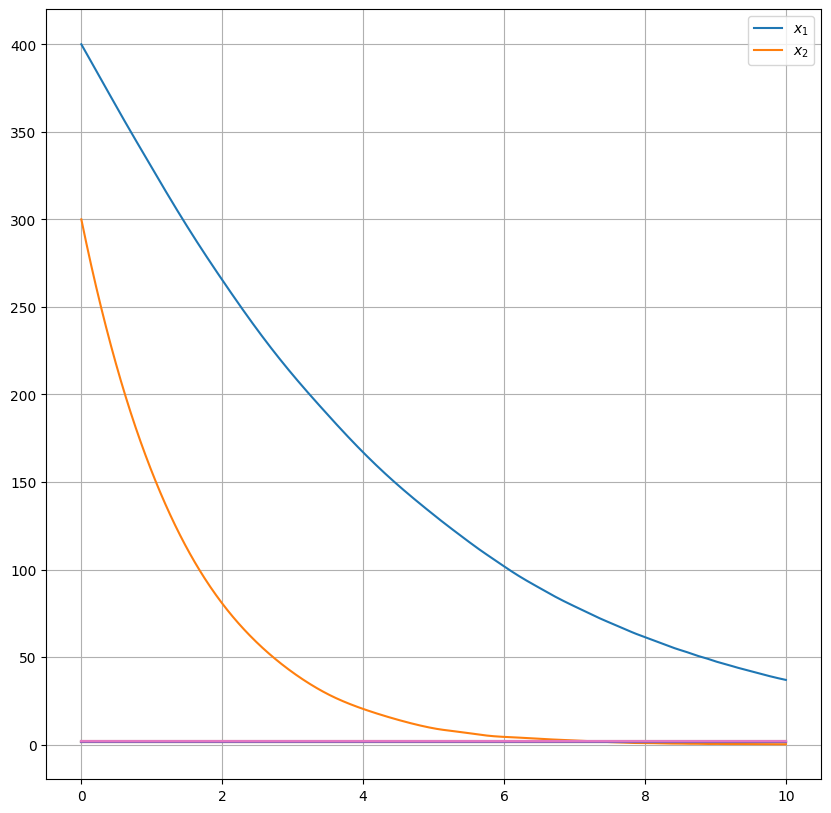

x_1(10) = 36.95731223110935
x_2(10) = 0.21205127137702764


In [8]:
# No modificar

beta1 = 0.25
beta2 = 0.75
phi = 0.341
sigma = 1.41
w = np.array([1.5, 1.625, 1.75, 1.875, 2.])
delta1 = np.array([1.2701176891, 0.28811319, 0.7046913486, 1.6134431034, 1.3446417529])
delta2 = np.array([-0.7036400735, 0.6840636606, -0.10897719, -0.0743175733, 0.2956309214])
gamma1 = np.array([0.1037113712, 1.047076925, 0.5479471621, 0.0876060119, 0.3195815276])
gamma2 = np.array([0.2402455157, 1.0757369327, -0.1477139499, 0.2254087452, -0.6149489323])
epsilon = np.array([-1.8381526674, 0.4706053887, 0.6223940632, -0.5343588147, 1.6342233293])
psi = np.array([1.521645759, 1.2701176891, -0.7036400735, 0.1037113712, 0.2402455157])

# Hacer aqui experimentos

# Obligatorio

out = solve_ivp(
    f_populations, [0, 10], [400, 300], t_eval=np.linspace(0, 10, 1000),
    args=(w, alpha, beta1, beta2, delta1, delta2, gamma1, gamma2, epsilon, psi, phi, sigma)
)

# Opcional

x1 = out.y[0,:]
x2 = out.y[1,:]
t  = out.t
plt.figure(figsize=(10,10))
plt.plot(t, x1, '-', label=r'$x_1$')
plt.plot(t, x2, '-', label=r'$x_2$')
for i in range(len(w)):
    plt.plot(t, w[i]+t*0, '-')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#Obligatorio

print('x_1(10) =', x1[-1])
print('x_2(10) =', x2[-1])

### ¡Ha llegado al final de la tarea 4! No olvide guardar este archivo y enviarlo antes de las 18:00 hrs. ¡Mucho éxito!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cec3c244-b1da-4213-b94c-4ae359502136' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>